For Text Mining assignment
 
 ONE:
1) Extract tweets for any user (try choosing a user who has more tweets)
2) Perform sentimental analysis on the tweets extracted from the above



In [1]:
#importing necessary packages to extract tweets using tweepy and perform sentiment analysis using textblob


import tweepy
import pandas as pd
from textblob import TextBlob
import json

In [2]:
# getting into twitter using consumer and access keys and through tweepy.api we take authorisation

CONSUMER_KEY = '*******************'
CONSUMER_SECRET = '************************'
ACCESS_KEY = '*****************************'
ACCESS_SECRET = '****************************'


auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
auth.secure = True
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [3]:
# getting 100 tweets of manchester united and also not taking retweets.

searchQuery = 'ManUtd'
retweet_filter='-filter:retweets'

q=searchQuery+retweet_filter
tweetsPerQry = 100
MU = 'tweets.txt'
sinceId = None

In [4]:
# downloading 100 tweets and also saving it in txt format

max_id = -1
maxTweets = 100

tweetCount = 0
print("Downloading max {0} tweets".format(maxTweets))
with open(MU, 'w') as f:
    while tweetCount < maxTweets:
        tweets = []
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry, tweet_mode='extended')

                else:
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry,
                                        since_id=sinceId, tweet_mode='extended')
            else:
                if (not sinceId):
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry,
                                        max_id=str(max_id - 1), tweet_mode='extended')
                else:
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry,
                                        max_id=str(max_id - 1),
                                        since_id=sinceId, tweet_mode='extended')
                    
            
            if not new_tweets:
                print("No more tweets found")
                break
            for tweet in new_tweets:
                f.write(str(tweet.full_text.replace('\n','').encode("utf-8"))+"\n")

            tweetCount += len(new_tweets)
            print("Downloaded {0} tweets".format(tweetCount))
            max_id = new_tweets[-1].id
                
        except tweepy.TweepError as e:
            # Just exit if any error
            print("some error : " + str(e))
            break
    
print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, MU))

Downloaded 100 tweets
Downloaded 100 tweets, Saved to tweets.txt


In [6]:
# Using re function we creating a function to remove the symbols,https etc from tweets

import re

def clean(tweet):
    tweet = re.sub(rr'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'@[A-Za-z0–9]+', '', tweet) 
    return tweet

def read_tweets(file_name):
    with open(file_name, 'r') as f:
        tweets = [clean(line.strip()) for line in f]
    f.close()
    return tweets

In [7]:
# implement our re function and also chcking the polarity of a tweet using textblob function

tweets = read_tweets(MU)
print(tweets[2])
print(TextBlob(tweets[2]).sentiment)

b'Refreshing to hear from  manager &amp; looking forward to a game of football. Sick of the hysterics from fans &amp; media on about transfer market MUFC'
Sentiment(polarity=-0.20476190476190478, subjectivity=0.7523809523809524)


## To the above tweet as we apply textblob function we got polarity is negative, from this we can understand that tweet has negative sentimence

In [8]:
#Using lambda and textblob function we create a function for polarity and sensitivity

polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

In [9]:
# storing the total polarity and sensitivity seperately

import numpy as np

tweet_polarity = np.zeros(len(tweets))
tweet_subjectivity = np.zeros(len(tweets))

for idx, tweet in enumerate(tweets):
    tweet_polarity[idx] = polarity(tweet)
    tweet_subjectivity[idx] = subjectivity(tweet)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

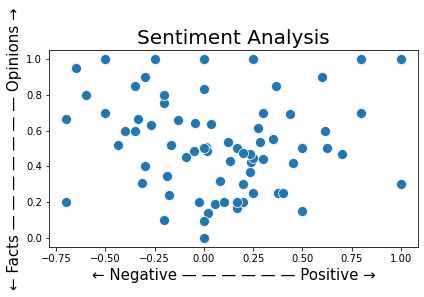

In [11]:
#plotting scatter plot to check the sentiment analysis

sns.scatterplot(tweet_polarity, # X-axis
                tweet_subjectivity,  # Y-axis
                s=100);


plt.title("Sentiment Analysis", fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.tight_layout()

#### from this scatter plot we can see the possitive tweets are there and also negative tweets are there, also neutral tweets are there, so for further clarification we plot subplots

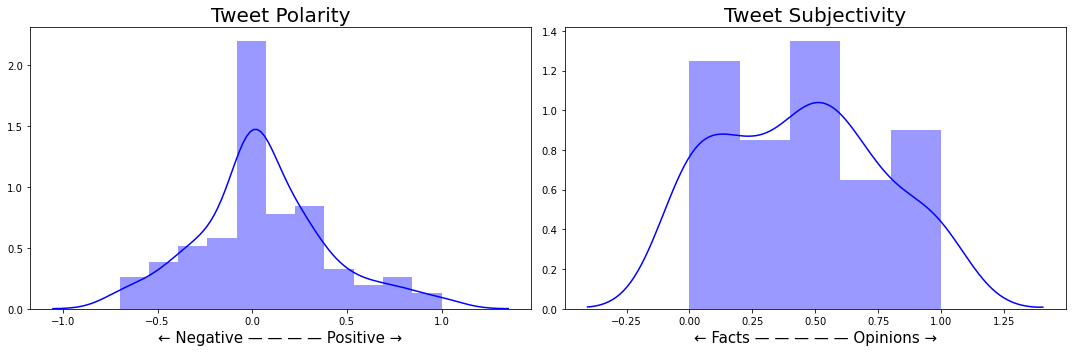

In [12]:
f, axs = plt.subplots(1, 2, figsize=(15,5))

sns.distplot(tweet_polarity, color="b", ax=axs[0])
axs[0].set_title("Tweet Polarity", fontsize = 20)
axs[0].set_xlabel('← Negative — — — — Positive →', fontsize=15)
sns.distplot(tweet_subjectivity, color="b", ax=axs[1])
axs[1].set_title("Tweet Subjectivity", fontsize = 20)
axs[1].set_xlabel('← Facts — — — — — Opinions →', fontsize=15)

plt.tight_layout()

### Conclusion: from this plot we can see tweets are of combined sentiment of possitive,negative and neutral

TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining


In [3]:
# importing necessary libraries to extract data from amazon

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 

In [6]:
# using requests we get into amazon url an using beautiful soup we extract reviews from amazon

mac_review=[]
url ="https://www.amazon.in/Apple-MacBook-16-inch-Storage-Intel-Core-i7/product-reviews/B081JWZQJB/ref=cm_cr_dp_d_lh_0?ie=UTF8&filterByKeyword=macbook+pro&pageNumber=1&reviewerType=all_reviews#reviews-filter-bar"
response = requests.get(url)
soup = bs(response.content,"html.parser")
reviews = soup.findAll('div',class_='a-row')
for i in range(0,len(reviews)):
    mac_review.append(reviews[i].get_text())
        
    
mac_review

['Customer reviews',
 '4.3 out of 5 stars4.3 out of 5',
 '4.3 out of 5',
 '214 global ratings',
 '\n\n\n\n\n\n            5 star\n          \n\n\n\n\n\n\n\n\n\n\n\n\n            \n              73%\n            \n          \n\n\n\n\n\n\n\n            4 star\n          \n\n\n\n\n\n\n\n\n\n\n\n\n            \n              11%\n            \n          \n\n\n\n\n\n\n\n            3 star\n          \n\n\n\n\n\n\n\n\n\n\n\n\n            \n              3%\n            \n          \n\n\n\n\n\n\n\n            2 star\n          \n\n\n\n\n\n\n\n\n\n\n\n\n            \n              3%\n            \n          \n\n\n\n\n\n\n\n            1 star\n          \n\n\n\n\n\n\n\n\n\n\n\n\n            \n              11%\n            \n          \n\n\n\n\n',
 'Apple MacBook Pro (16-inch, 16GB RAM, 512GB Storage, 2.6GHz 9th Gen Intel\xa0Core\xa0i7) - Space Grey',
 '\n\n    byApple\n\n',
 'Colour: Space GraySize name: 512GBStyle name: 2.6GHz 9th Gen Intel\xa0Core\xa0i7Change',
 'How are ratings calculated?

In [7]:
# we are joining the entire string to one to perfrom upcoming functions

mac_review_entire= ' '.join(mac_review)
mac_review_entire

'Customer reviews 4.3 out of 5 stars4.3 out of 5 4.3 out of 5 214 global ratings \n\n\n\n\n\n            5 star\n          \n\n\n\n\n\n\n\n\n\n\n\n\n            \n              73%\n            \n          \n\n\n\n\n\n\n\n            4 star\n          \n\n\n\n\n\n\n\n\n\n\n\n\n            \n              11%\n            \n          \n\n\n\n\n\n\n\n            3 star\n          \n\n\n\n\n\n\n\n\n\n\n\n\n            \n              3%\n            \n          \n\n\n\n\n\n\n\n            2 star\n          \n\n\n\n\n\n\n\n\n\n\n\n\n            \n              3%\n            \n          \n\n\n\n\n\n\n\n            1 star\n          \n\n\n\n\n\n\n\n\n\n\n\n\n            \n              11%\n            \n          \n\n\n\n\n Apple MacBook Pro (16-inch, 16GB RAM, 512GB Storage, 2.6GHz 9th Gen Intel\xa0Core\xa0i7) - Space Grey \n\n    byApple\n\n Colour: Space GraySize name: 512GBStyle name: 2.6GHz 9th Gen Intel\xa0Core\xa0i7Change How are ratings calculated?To calculate the overall star rat

In [8]:
# to remove emojis we are defining a function using re.
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)



In [9]:
reviews_withoutemoji=remove_emoji(mac_review_entire)
reviews_withoutemoji

'Customer reviews 4.3 out of 5 stars4.3 out of 5 4.3 out of 5 214 global ratings \n\n\n\n\n\n            5 star\n          \n\n\n\n\n\n\n\n\n\n\n\n\n            \n              73%\n            \n          \n\n\n\n\n\n\n\n            4 star\n          \n\n\n\n\n\n\n\n\n\n\n\n\n            \n              11%\n            \n          \n\n\n\n\n\n\n\n            3 star\n          \n\n\n\n\n\n\n\n\n\n\n\n\n            \n              3%\n            \n          \n\n\n\n\n\n\n\n            2 star\n          \n\n\n\n\n\n\n\n\n\n\n\n\n            \n              3%\n            \n          \n\n\n\n\n\n\n\n            1 star\n          \n\n\n\n\n\n\n\n\n\n\n\n\n            \n              11%\n            \n          \n\n\n\n\n Apple MacBook Pro (16-inch, 16GB RAM, 512GB Storage, 2.6GHz 9th Gen Intel\xa0Core\xa0i7) - Space Grey \n\n    byApple\n\n Colour: Space GraySize name: 512GBStyle name: 2.6GHz 9th Gen Intel\xa0Core\xa0i7Change How are ratings calculated?To calculate the overall star rat

In [10]:
# for removing character special characters and number:

reviews_withoutemoji=re.sub('[^A-Za-z' ']+',' ',reviews_withoutemoji).lower()
reviews_withoutemoji=re.sub('[<>#\/?]+',' ',reviews_withoutemoji)
reviews_withoutemoji

'customer reviews out of stars out of out of global ratings star star star star star apple macbook pro inch gb ram gb storage ghz th gen intel core i space grey byapple colour space graysize name gbstyle name ghz th gen intel core i change how are ratings calculated to calculate the overall star rating and percentage breakdown by star we don t use a simple average instead our system considers things like how recent a review is and if the reviewer bought the item on amazon it also analyses reviews to verify trustworthiness see all buying options add to wish list top positive reviewall positive reviews naveen out of starsthe best macbook seen in years after mid model reviewed in india on november an scissor mechanism keyboard inch display and big battery does the inch macbook pro a best option for the serious people out there pros improved magic keyboard inch display with slimmer bezels performance house speaker audio best in class and hours of battery life what i didn t like upgrades to

In [11]:
# using nltk we remove stopwords, using string we remove punctuations and converting to words by defining a function

from nltk.corpus import stopwords
import string


def process_text(text):
    nopunc=[ char for char in text if char not in string.punctuation]
    nopunc= ''.join(nopunc)
    
    clean_words=[words for words in nopunc.split() if words.lower() not in stopwords.words('english')]
    return clean_words

cleaned_words=process_text(reviews_withoutemoji)
cleaned_words

['customer',
 'reviews',
 'stars',
 'global',
 'ratings',
 'star',
 'star',
 'star',
 'star',
 'star',
 'apple',
 'macbook',
 'pro',
 'inch',
 'gb',
 'ram',
 'gb',
 'storage',
 'ghz',
 'th',
 'gen',
 'intel',
 'core',
 'space',
 'grey',
 'byapple',
 'colour',
 'space',
 'graysize',
 'name',
 'gbstyle',
 'name',
 'ghz',
 'th',
 'gen',
 'intel',
 'core',
 'change',
 'ratings',
 'calculated',
 'calculate',
 'overall',
 'star',
 'rating',
 'percentage',
 'breakdown',
 'star',
 'use',
 'simple',
 'average',
 'instead',
 'system',
 'considers',
 'things',
 'like',
 'recent',
 'review',
 'reviewer',
 'bought',
 'item',
 'amazon',
 'also',
 'analyses',
 'reviews',
 'verify',
 'trustworthiness',
 'see',
 'buying',
 'options',
 'add',
 'wish',
 'list',
 'top',
 'positive',
 'reviewall',
 'positive',
 'reviews',
 'naveen',
 'starsthe',
 'best',
 'macbook',
 'seen',
 'years',
 'mid',
 'model',
 'reviewed',
 'india',
 'november',
 'scissor',
 'mechanism',
 'keyboard',
 'inch',
 'display',
 'big',
 

In [12]:
# we will join this cleaned words togethere so that we can apply wordcloud

cleaned_text=' '.join(cleaned_words)
cleaned_text

'customer reviews stars global ratings star star star star star apple macbook pro inch gb ram gb storage ghz th gen intel core space grey byapple colour space graysize name gbstyle name ghz th gen intel core change ratings calculated calculate overall star rating percentage breakdown star use simple average instead system considers things like recent review reviewer bought item amazon also analyses reviews verify trustworthiness see buying options add wish list top positive reviewall positive reviews naveen starsthe best macbook seen years mid model reviewed india november scissor mechanism keyboard inch display big battery inch macbook pro best option serious people pros improved magic keyboard inch display slimmer bezels performance house speaker audio best class hours battery life like upgrades processor upto cores gpu upto gb ram upto gb storage options upto tb ssd us dispite priced display isnt k touch bar still make compelling case ports still limited usb c full size usb port sd 

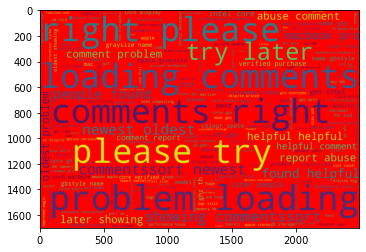

In [13]:
# we are ploting a simple wordcloud from cleanedtext

from wordcloud import WordCloud

wordcloud_cleaned = WordCloud(
                      background_color='red',
                      width=2500,
                      height=1700,
                     ).generate(cleaned_text)
plt.imshow(wordcloud_cleaned)

In [14]:
# lets import negative words and possitive words

with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
    
poswords = poswords[36:]

with open("negative-words.txt","r") as pos:
    negwords = pos.read().split("\n")
    
negwords = negwords[37:]


poswords[10],negwords[9]

('accolades', 'abrade')

In [15]:
#selecting negative words from the cleaned_words

neg_word=' '.join([ w for w in cleaned_words if w in negwords])
neg_word

'breakdown limited critical critical problem sucks limited limited critical critical problem sucks critical critical problem sucks problem sucks abuse problem problem problem sucks abuse problem problem abuse problem problem limited abuse problem problem limited abuse problem problem abuse problem problem problems problem disappointed abuse problem problem problems problem disappointed abuse problem problem abuse problem problem issues abuse problem problem issues abuse problem problem abuse problem problem lacking issues lag problems abuse problem problem lacking issues lag problems abuse problem problem abuse problem problem missed abuse problem problem missed abuse problem problem abuse problem problem abuse problem problem abuse problem problem abuse problem problem fear abuse problem problem fear abuse problem problem abuse problem problem insanely regret abuse problem problem insanely regret abuse problem problem abuse problem problem wrong abuse problem problem wrong abuse probl

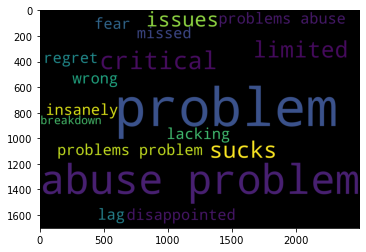

In [17]:
# wordcloud for negative words:

wordcloud_negative= WordCloud(
                      background_color='black',
                      width=2500,
                      height=1700,
                     ).generate(neg_word)

plt.imshow(wordcloud_negative)

In [18]:
# selecting possitive words from cleaned_words:

poss_words=' '.join([w for w in cleaned_words if w in poswords])
poss_words

'like trustworthiness top positive positive best best pros improved magic best like recommend helpful top amazing boost available helpful top positive positive best best pros improved magic best like recommend top positive positive best best pros improved magic best like recommend helpful top amazing boost available top amazing boost available helpful top clear amazing boost available helpful helpful right right amazing boost available helpful helpful right right helpful helpful right right helpful best best pros improved magic best like recommend helpful helpful right right best best pros improved magic best like recommend helpful helpful right right helpful helpful right right helpful excellent perfect good available solid love helpful helpful right right excellent perfect good available solid love helpful helpful right right helpful helpful right right helpful magic good best stable better helpful helpful right right magic good best stable better helpful helpful right right helpful 

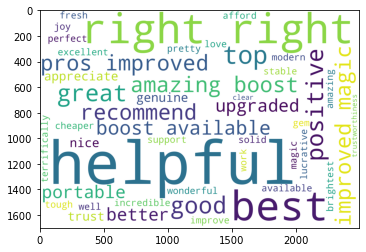

In [19]:
# wordcloud for possitive words:

wordcloud_possitive= WordCloud(
                      background_color='white',
                      width=2500,
                      height=1700,
                     ).generate(poss_words)

plt.imshow(wordcloud_possitive)
